In [4]:
# add a comment for the sake of it
# and another

In [1]:
import pandas as pd
import numpy as np
import torch

from sklearn.preprocessing import StandardScaler  # for feature scaling
from sklearn.model_selection import train_test_split  # for train/test split

from scipy import stats


In [3]:
df = pd.read_csv('C:/Users/dgwal/jup_notebook/tennis.csv')
df.head()

,Unnamed: 0,flag,rolling_rank_diff,rolling_rank points_diff,rolling_ace_per_svpt_diff,rolling_df_per_svpt_diff,rolling_1stIn_per_svpt_diff,rolling_1stWon_per_svpt_diff,rolling_2ndWon_per_svpt_diff,rolling_bpSaved_per_svpt_diff,rolling_bpFaced_per_svpt_diff,rolling_bpSaved_per_bpFaced_diff,Elo_diff
0,0,0,-34.90000,760.50000,0.01423,0.01371,0.07728,0.08082,-0.05444,-0.02077,-0.01596,-0.27333,-78.445761
1,1,1,-20.41667,1321.25000,0.02177,-0.02151,0.05423,0.04467,-0.02390,0.00738,0.00139,0.14623,10.230310
2,2,0,-3.12821,425.25641,0.02513,-0.01549,0.00616,-0.00185,0.00823,0.00175,-0.00033,0.03552,-49.280859
3,3,0,8.61538,-53.00000,0.00196,-0.00438,-0.01586,-0.02335,0.01013,0.00763,0.00764,0.10385,0.340261
4,4,0,9.90909,84.81818,0.02491,-0.00310,-0.02679,-0.00749,0.02392,-0.00412,-0.00722,-0.02693,-28.821694


In [4]:
#df.sort_values('rolling_1stIn_per_svpt_diff')
#df.head(20)
mask = ~df.isnull().any(axis=1)
df = df[mask]

# remove outliers (arbitrary z score of 7)
df = df[(np.abs(stats.zscore(df)) < 7).all(axis=1)]



In [5]:
X = df.iloc[:, 2:].to_numpy()
y = df.iloc[:, 1].to_numpy()

print(f"First 4 X features:\n{X[:4]}")
print(f"\nFirst 4 y labels:\n{y[:4]}")

First 4 X features:
[[-3.49000000e+01  7.60500000e+02  1.42300000e-02  1.37100000e-02
   7.72800000e-02  8.08200000e-02 -5.44400000e-02 -2.07700000e-02
  -1.59600000e-02 -2.73330000e-01 -7.84457608e+01]
 [-2.04166700e+01  1.32125000e+03  2.17700000e-02 -2.15100000e-02
   5.42300000e-02  4.46700000e-02 -2.39000000e-02  7.38000000e-03
   1.39000000e-03  1.46230000e-01  1.02303100e+01]
 [-3.12821000e+00  4.25256410e+02  2.51300000e-02 -1.54900000e-02
   6.16000000e-03 -1.85000000e-03  8.23000000e-03  1.75000000e-03
  -3.30000000e-04  3.55200000e-02 -4.92808593e+01]
 [ 8.61538000e+00 -5.30000000e+01  1.96000000e-03 -4.38000000e-03
  -1.58600000e-02 -2.33500000e-02  1.01300000e-02  7.63000000e-03
   7.64000000e-03  1.03850000e-01  3.40260829e-01]]

First 4 y labels:
[0 1 0 0]


In [6]:
sc = StandardScaler()
X = sc.fit_transform(X)
#X_test = sc.transform(X_test)


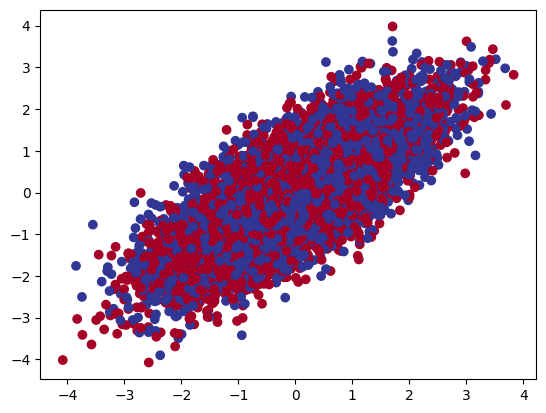

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 4], 
            y=X[:, 5], 
            c=y, 
            cmap=plt.cm.RdYlBu);

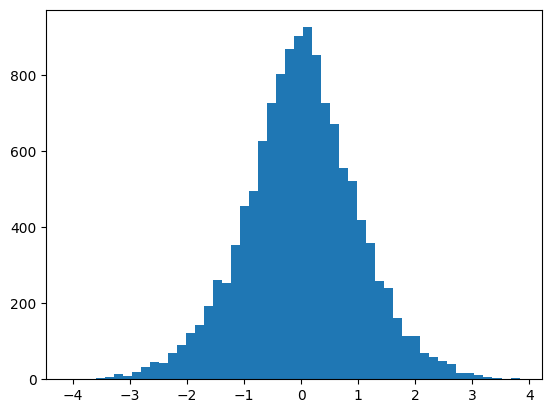

In [8]:
plt.hist(X[:, 4], bins = 50);

In [9]:
# Check the shapes of our features and labels
X.shape, y.shape

((12734, 11), (12734,))

In [10]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-1.24228109  0.69905031  0.65284699  1.74876463  3.46459923  3.43648641
 -3.76209417 -2.52518924 -1.28790304 -4.97805166 -0.48063785] and the same for y: 0
Shapes for one sample of X: (11,) and the same for y: ()


In [11]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[-1.2423,  0.6991,  0.6528,  1.7488,  3.4646,  3.4365, -3.7621, -2.5252,
          -1.2879, -4.9781, -0.4806],
         [-0.7261,  1.2058,  0.9998, -2.7355,  2.4317,  1.9032, -1.6556,  0.8770,
           0.1029,  2.6337,  0.0804],
         [-0.1100,  0.3961,  1.1544, -1.9691,  0.2778, -0.0700,  0.5606,  0.1965,
          -0.0350,  0.6252, -0.2961],
         [ 0.3085, -0.0361,  0.0882, -0.5545, -0.7089, -0.9820,  0.6917,  0.9072,
           0.6039,  1.8649,  0.0178],
         [ 0.3546,  0.0884,  1.1443, -0.3915, -1.1987, -0.3093,  1.6429, -0.5129,
          -0.5873, -0.5078, -0.1667]]),
 tensor([0., 1., 0., 0., 0.]))

In [12]:
# Split data into train and test sets - chronological data so this is a bit meh but let's go with it for now...
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(10187, 2547, 10187, 2547)

In [13]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [14]:
X.shape[1]

11

In [15]:
# 1. Construct a model class that subclasses nn.Module
class TennisModel1(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=X.shape[1], out_features=5) # takes features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
    
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = TennisModel1().to(device)
model_0

TennisModel1(
  (layer_1): Linear(in_features=11, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=X.shape[1], out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0


Sequential(
  (0): Linear(in_features=11, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 2547, Shape: torch.Size([2547, 1])
Length of test samples: 2547, Shape: torch.Size([2547])

First 10 predictions:
tensor([[-0.1833],
        [ 0.5313],
        [ 0.1270],
        [ 0.5969],
        [ 0.0845],
        [ 0.2681],
        [-0.3445],
        [ 0.6385],
        [ 0.4158],
        [-0.0075]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([0., 1., 0., 0., 1., 0., 0., 0., 1., 0.])


In [18]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

In [19]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [20]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1833],
        [ 0.5313],
        [ 0.1270],
        [ 0.5969],
        [ 0.0845]], grad_fn=<SliceBackward0>)

In [21]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4543],
        [0.6298],
        [0.5317],
        [0.6450],
        [0.5211]], grad_fn=<SigmoidBackward0>)

In [22]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 1., 1., 1., 1.], grad_fn=<SqueezeBackward0>)

In [23]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.68832, Accuracy: 54.15% | Test loss: 0.68366, Test acc: 55.24%
Epoch: 10 | Loss: 0.66894, Accuracy: 58.71% | Test loss: 0.66446, Test acc: 59.99%
Epoch: 20 | Loss: 0.65116, Accuracy: 62.50% | Test loss: 0.64651, Test acc: 63.84%
Epoch: 30 | Loss: 0.63314, Accuracy: 65.43% | Test loss: 0.62827, Test acc: 66.47%
Epoch: 40 | Loss: 0.61500, Accuracy: 68.06% | Test loss: 0.61006, Test acc: 68.75%
Epoch: 50 | Loss: 0.59802, Accuracy: 69.97% | Test loss: 0.59315, Test acc: 70.28%
Epoch: 60 | Loss: 0.58351, Accuracy: 70.96% | Test loss: 0.57880, Test acc: 71.34%
Epoch: 70 | Loss: 0.57213, Accuracy: 71.67% | Test loss: 0.56755, Test acc: 72.01%
Epoch: 80 | Loss: 0.56377, Accuracy: 72.21% | Test loss: 0.55923, Test acc: 72.44%
Epoch: 90 | Loss: 0.55791, Accuracy: 72.64% | Test loss: 0.55330, Test acc: 72.32%


In [24]:
class TennisModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=X.shape[1], out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = TennisModel2().to(device)
model_1

TennisModel2(
  (layer_1): Linear(in_features=11, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [25]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [26]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71028, Accuracy: 49.95% | Test loss: 0.70597, Test acc: 49.23%
Epoch: 100 | Loss: 0.55008, Accuracy: 73.02% | Test loss: 0.54707, Test acc: 73.34%
Epoch: 200 | Loss: 0.54491, Accuracy: 73.53% | Test loss: 0.53979, Test acc: 73.69%
Epoch: 300 | Loss: 0.54473, Accuracy: 73.53% | Test loss: 0.53950, Test acc: 73.54%
Epoch: 400 | Loss: 0.54465, Accuracy: 73.52% | Test loss: 0.53945, Test acc: 73.73%
Epoch: 500 | Loss: 0.54461, Accuracy: 73.57% | Test loss: 0.53945, Test acc: 73.69%
Epoch: 600 | Loss: 0.54458, Accuracy: 73.57% | Test loss: 0.53946, Test acc: 73.73%
Epoch: 700 | Loss: 0.54456, Accuracy: 73.60% | Test loss: 0.53948, Test acc: 73.66%
Epoch: 800 | Loss: 0.54455, Accuracy: 73.57% | Test loss: 0.53950, Test acc: 73.69%
Epoch: 900 | Loss: 0.54454, Accuracy: 73.58% | Test loss: 0.53952, Test acc: 73.69%


In [27]:
# Build model with non-linear activation function
from torch import nn
class TennisModel3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=X.shape[1], out_features=20)
        self.layer_2 = nn.Linear(in_features=20, out_features=30)
        self.layer_3 = nn.Linear(in_features=30, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = TennisModel3().to(device)
print(model_3)

TennisModel3(
  (layer_1): Linear(in_features=11, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=30, bias=True)
  (layer_3): Linear(in_features=30, out_features=1, bias=True)
  (relu): ReLU()
)


In [28]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [29]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69725, Accuracy: 50.18% | Test Loss: 0.69726, Test Accuracy: 49.67%
Epoch: 100 | Loss: 0.65462, Accuracy: 67.36% | Test Loss: 0.65352, Test Accuracy: 67.33%
Epoch: 200 | Loss: 0.56012, Accuracy: 72.12% | Test Loss: 0.55792, Test Accuracy: 71.85%
Epoch: 300 | Loss: 0.54444, Accuracy: 72.98% | Test Loss: 0.54184, Test Accuracy: 73.30%
Epoch: 400 | Loss: 0.54190, Accuracy: 73.17% | Test Loss: 0.53997, Test Accuracy: 73.77%
Epoch: 500 | Loss: 0.54054, Accuracy: 73.29% | Test Loss: 0.53929, Test Accuracy: 74.24%
Epoch: 600 | Loss: 0.53975, Accuracy: 73.61% | Test Loss: 0.53892, Test Accuracy: 74.28%
Epoch: 700 | Loss: 0.53924, Accuracy: 73.62% | Test Loss: 0.53869, Test Accuracy: 74.17%
Epoch: 800 | Loss: 0.53881, Accuracy: 73.61% | Test Loss: 0.53846, Test Accuracy: 74.32%
Epoch: 900 | Loss: 0.53844, Accuracy: 73.56% | Test Loss: 0.53826, Test Accuracy: 74.36%


In [30]:
import captum

In [31]:
from captum.attr import IntegratedGradients,NoiseTunnel,GradientShap,Occlusion, LayerConductance, NeuronConductance, DeepLift, FeatureAblation

In [32]:
ig = IntegratedGradients(model_3)
ig_nt = NoiseTunnel(ig)
dl = DeepLift(model_3)
gs = GradientShap(model_3)
fa = FeatureAblation(model_3)

ig_attr_test = ig.attribute(X_test, n_steps=50)
ig_nt_attr_test = ig_nt.attribute(X_test)
#dl_attr_test = dl.attribute(X_test)
gs_attr_test = gs.attribute(X_test, X_train)
fa_attr_test = fa.attribute(X_test)

In [33]:
from captum.attr import Saliency

In [34]:
# Defining Saliency interpreter
saliency = Saliency(model_3)
# Computes saliency maps for class 3.
attribution = saliency.attribute(X_test)

c:\Users\dgwal\pytorch_lr\.venv\Lib\site-packages\captum\_utils\gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


In [35]:
attribution.shape

torch.Size([2547, 11])

Average Feature Importances
rolling_rank_diff :  0.076
rolling_rank points_diff :  0.044
rolling_ace_per_svpt_diff :  0.071
rolling_df_per_svpt_diff :  0.064
rolling_1stIn_per_svpt_diff :  0.080
rolling_1stWon_per_svpt_diff :  0.070
rolling_2ndWon_per_svpt_diff :  0.085
rolling_bpSaved_per_svpt_diff :  0.151
rolling_bpFaced_per_svpt_diff :  0.176
rolling_bpSaved_per_bpFaced_diff :  0.099
Elo_diff :  1.488


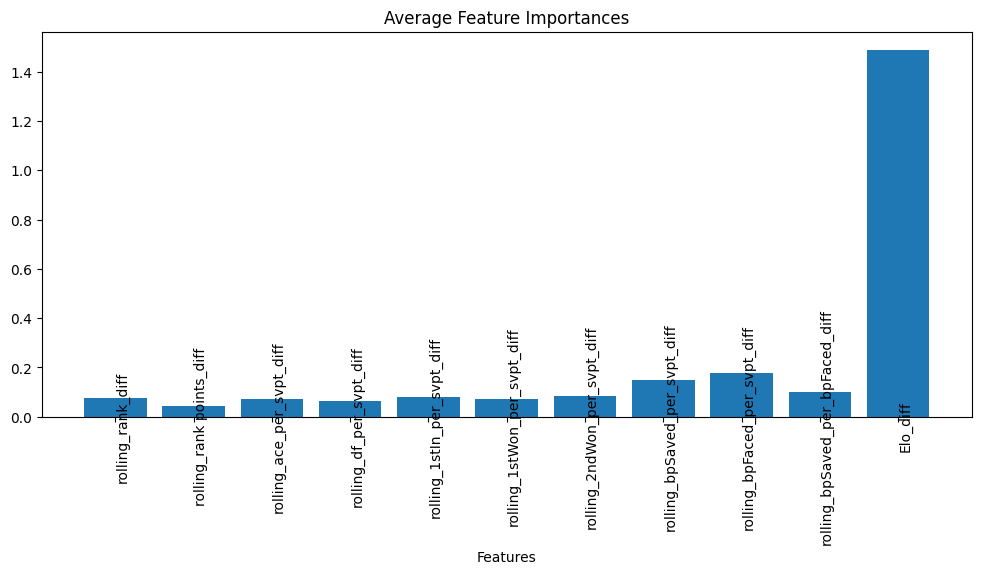

In [36]:
feature_names = df.columns[2:]

# Helper method to print importances and visualize distribution
def visualize_importances(feature_names, importances, title="Average Feature Importances", plot=True, axis_title="Features"):
    print(title)
    for i in range(len(feature_names)):
        print(feature_names[i], ": ", '%.3f'%(importances[i]))
    x_pos = (np.arange(len(feature_names)))
    if plot:
        plt.figure(figsize=(12,5))
        plt.bar(x_pos, importances, align='center')
        plt.xticks(x_pos, feature_names, wrap=True, rotation=90)
        plt.xlabel(axis_title)
        plt.title(title)

visualize_importances(feature_names, torch.mean(attribution, axis=0))

In [37]:
np.mean(attribution, axis=0)

TypeError: mean() received an invalid combination of arguments - got (axis=int, dtype=NoneType, out=NoneType, ), but expected one of:
 * (*, torch.dtype dtype = None)
 * (tuple of ints dim, bool keepdim = False, *, torch.dtype dtype = None)
 * (tuple of names dim, bool keepdim = False, *, torch.dtype dtype = None)


In [51]:
torch.mean(attribution, axis=0)

tensor([0.0606, 0.0534, 0.0711, 0.0560, 0.0625, 0.0481, 0.0631, 0.1461, 0.1464,
        0.0881, 1.5071])